In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importación de datos

In [98]:
data = pd.read_excel("bank_churn.xlsx")

In [51]:
data.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploratory Data Analysis

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [47]:
data.isna().sum()

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [16]:
data['education_level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [15]:
data['marital_status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [14]:
data['card_category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [52]:
data['income_category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
clientnum,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
customer_age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
total_relationship_count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
months_inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
contacts_count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
credit_limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
total_revolving_bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
avg_open_to_buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [33]:
data['attrition_flag'].value_counts() / data['attrition_flag'].value_counts().sum()

attrition_flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: count, dtype: float64

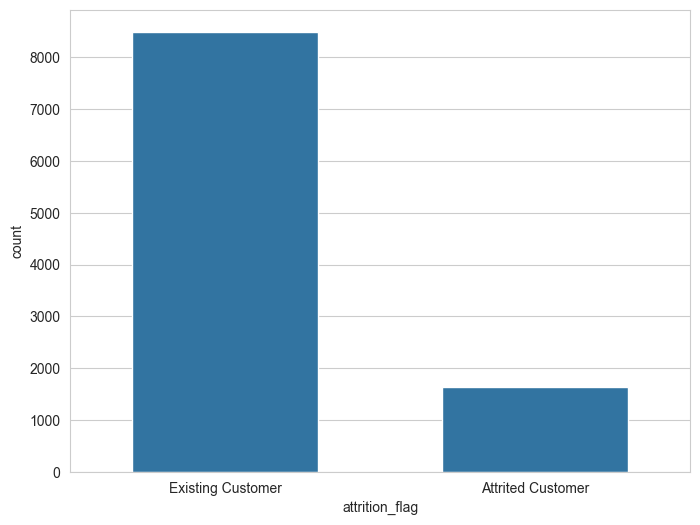

In [87]:
subset_1 = data['attrition_flag'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='attrition_flag', y='count', data=subset_1, width=0.6)
plt.show()

In [34]:
data['gender'].value_counts() / data['gender'].value_counts().sum()

gender
F    0.529081
M    0.470919
Name: count, dtype: float64

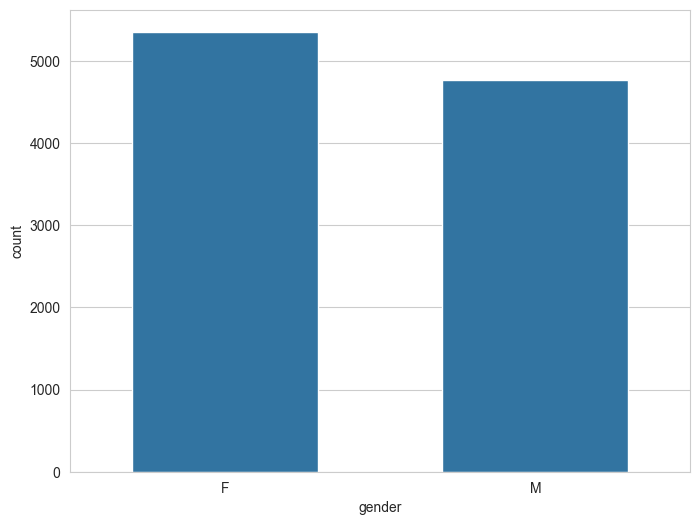

In [88]:
subset_2 = data['gender'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='count', data=subset_2, width=0.6)
plt.show()

In [18]:
data['income_category'].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [23]:
data['income_category'].value_counts()/data['income_category'].value_counts().sum()

income_category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: count, dtype: float64

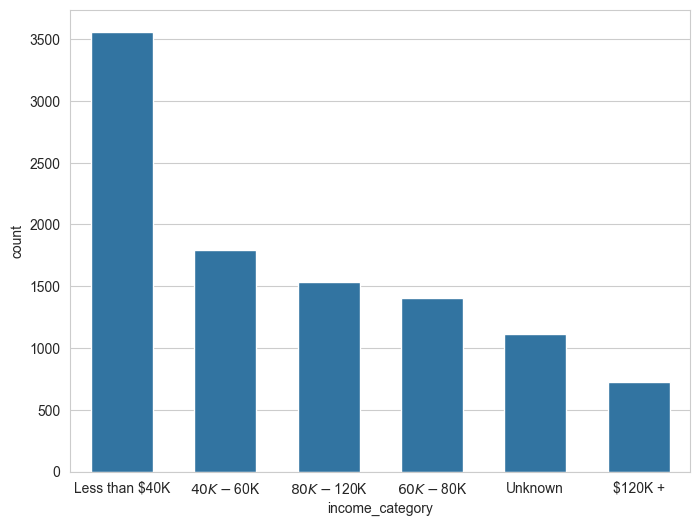

In [89]:
subset_3 = data['income_category'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='income_category', y='count', data=subset_3, width=0.6)
plt.show()

In [21]:
data['education_level'].value_counts()

education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [22]:
data['education_level'].value_counts()/data['education_level'].value_counts().sum()

education_level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: count, dtype: float64

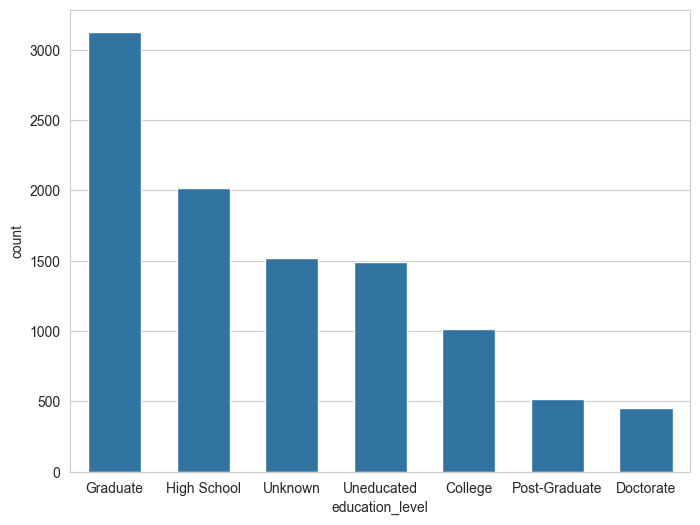

In [90]:
subset_4 = data['education_level'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='education_level', y='count', data=subset_4, width=0.6)
plt.show()


In [69]:
data['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [70]:
data['marital_status'].value_counts()/data['marital_status'].value_counts().sum()

marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: count, dtype: float64

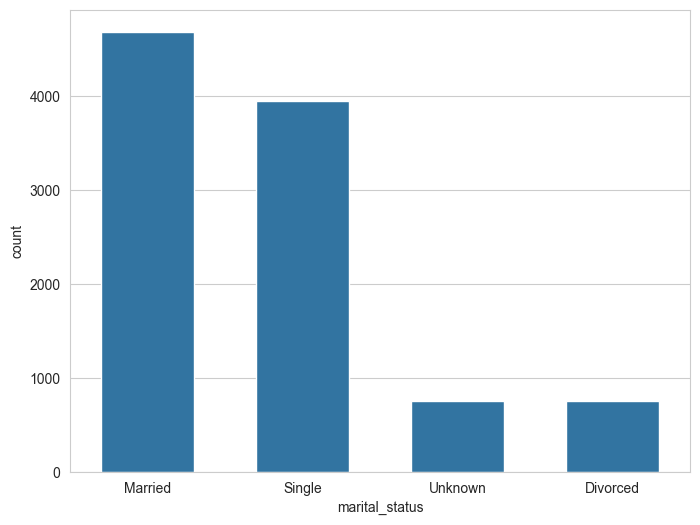

In [91]:
subset_5 = data['marital_status'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='marital_status', y='count', data=subset_5, width=0.6)
plt.show()

In [79]:
data['card_category'].value_counts()/data['card_category'].value_counts().sum()

card_category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: count, dtype: float64

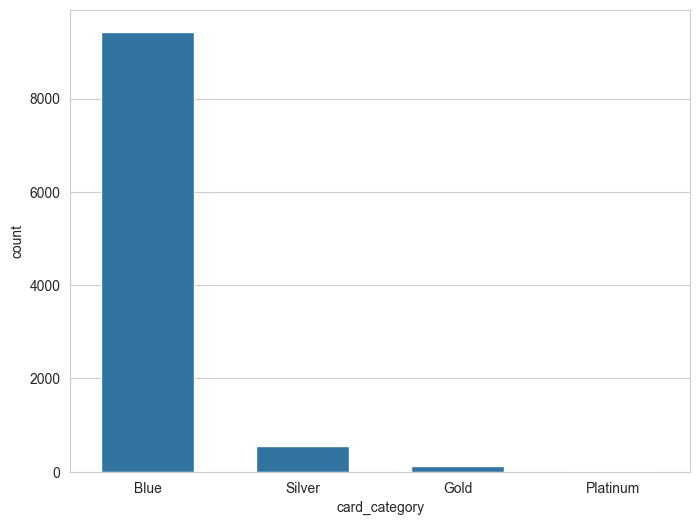

In [92]:
subset_6 = data['card_category'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='card_category', y='count', data=subset_6, width=0.6)
plt.show()

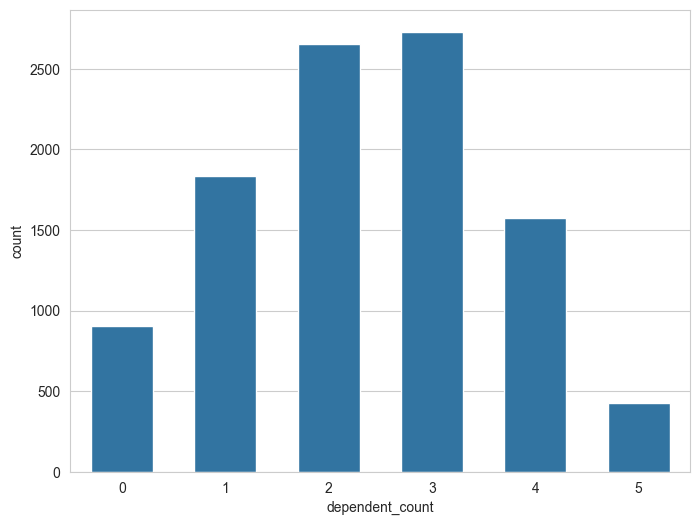

In [93]:
subset_7 = data['dependent_count'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='dependent_count', y='count', data=subset_7, width=0.6)
plt.show()

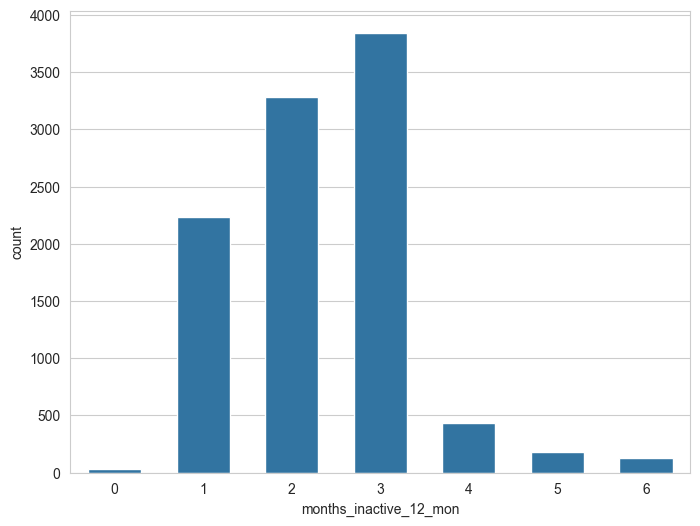

In [103]:
subset_8 = data['months_inactive_12_mon'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='months_inactive_12_mon', y='count', data=subset_8, width=0.6)
plt.show()

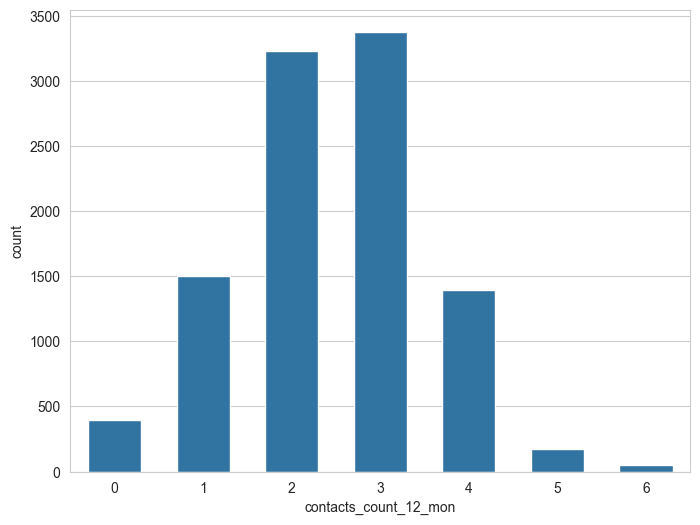

In [104]:
subset_9 = data['contacts_count_12_mon'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='contacts_count_12_mon', y='count', data=subset_9, width=0.6)
plt.show()

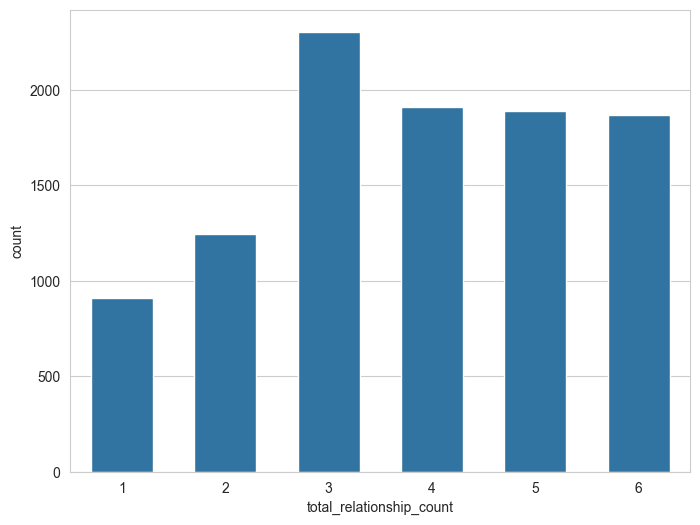

In [107]:
subset_10 = data['total_relationship_count'].value_counts().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='total_relationship_count', y='count', data=subset_10, width=0.6)
plt.show()

In [81]:
data.loc[data['card_category'] == 'Blue']['income_category'].value_counts()

income_category
Less than $40K    3403
$40K - $60K       1675
$80K - $120K      1395
$60K - $80K       1273
Unknown           1045
$120K +            645
Name: count, dtype: int64

In [76]:
data.loc[data['income_category'] == 'Unknown']['gender'].value_counts()

gender
F    1060
M      52
Name: count, dtype: int64

In [27]:
data.loc[data['education_level'] == 'Unknown']['gender'].value_counts()

gender
F    812
M    707
Name: count, dtype: int64

In [77]:
data.loc[data['marital_status'] == 'Unknown']['gender'].value_counts()

gender
F    380
M    369
Name: count, dtype: int64

In [82]:
data.loc[data['income_category'] == 'Unknown']

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,...,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


In [20]:
data.loc[data['education_level'] == 'Unknown']

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,...,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,...,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [71]:
data.loc[data['marital_status'] == 'Unknown']

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,708790833,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,816082233,Existing Customer,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,...,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10070,747551658,Existing Customer,47,M,3,High School,Unknown,$80K - $120K,Silver,40,...,3,2,34516.0,1371,33145.0,0.691,15930,123,0.836,0.040
10100,719848008,Existing Customer,39,M,2,Graduate,Unknown,$60K - $80K,Silver,36,...,2,2,29808.0,0,29808.0,0.669,16098,128,0.684,0.000
10101,718372458,Existing Customer,42,M,2,Graduate,Unknown,$40K - $60K,Blue,30,...,2,5,3735.0,1723,2012.0,0.595,14501,92,0.840,0.461
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


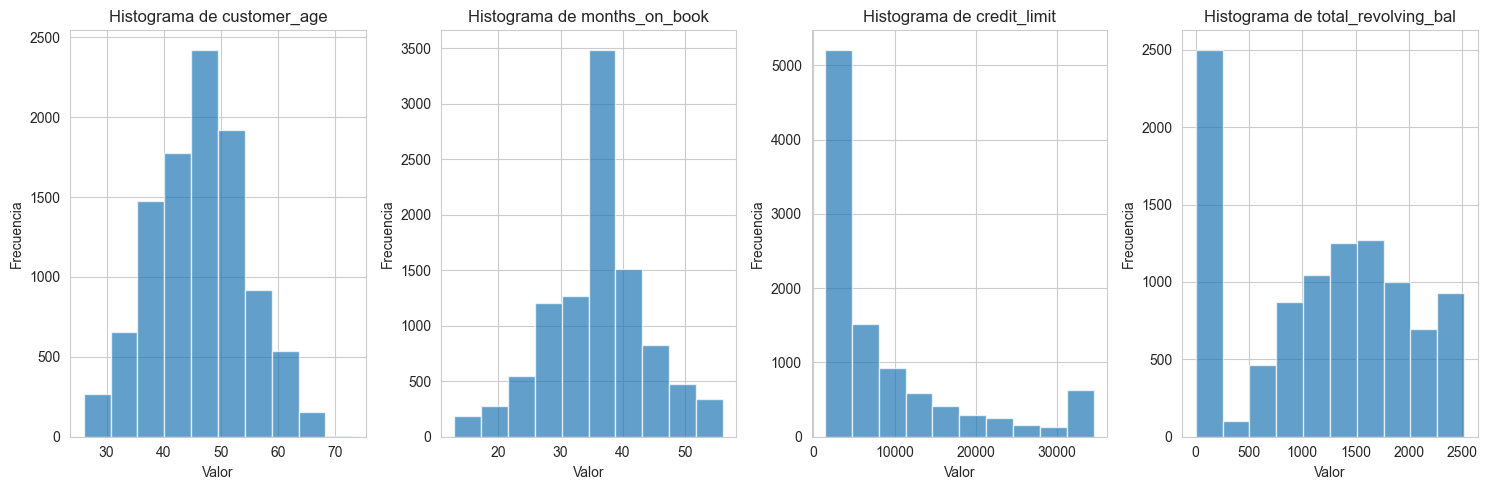

In [108]:
columnas = ['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal']  

fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))  # 1 fila y tantas columnas como variables

for i, columna in enumerate(columnas):
    axs[i].hist(data[columna], bins=10, alpha=0.7)
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

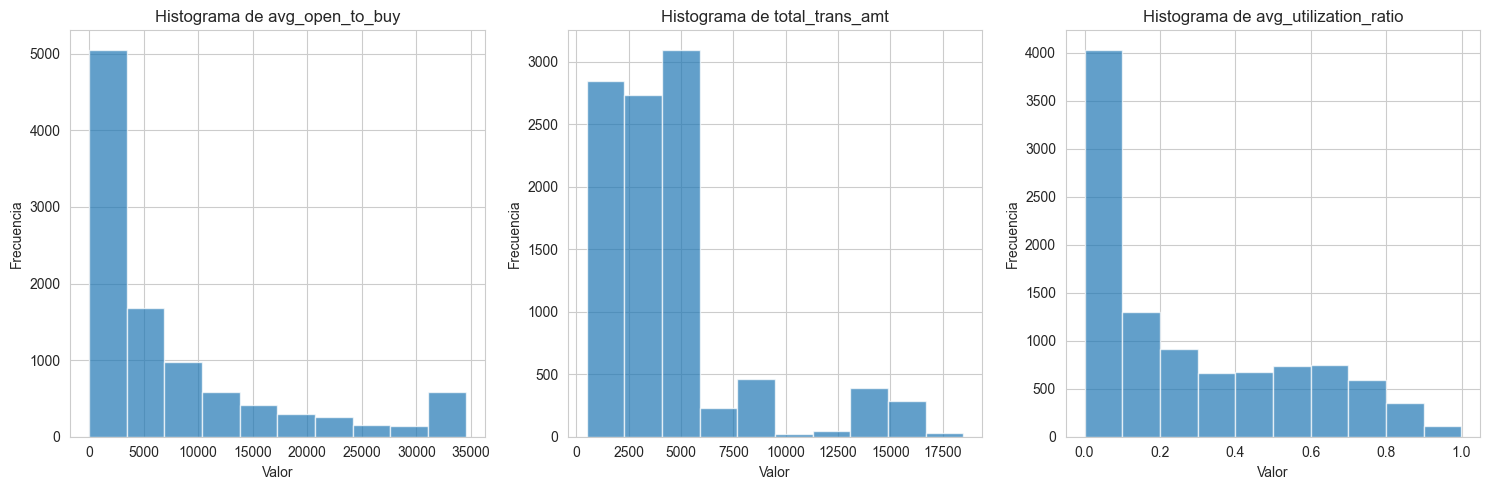

In [111]:
columnas = ['avg_open_to_buy', 'total_trans_amt', 'avg_utilization_ratio']  

fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))  # 1 fila y tantas columnas como variables

for i, columna in enumerate(columnas):
    axs[i].hist(data[columna], bins=10, alpha=0.7)
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

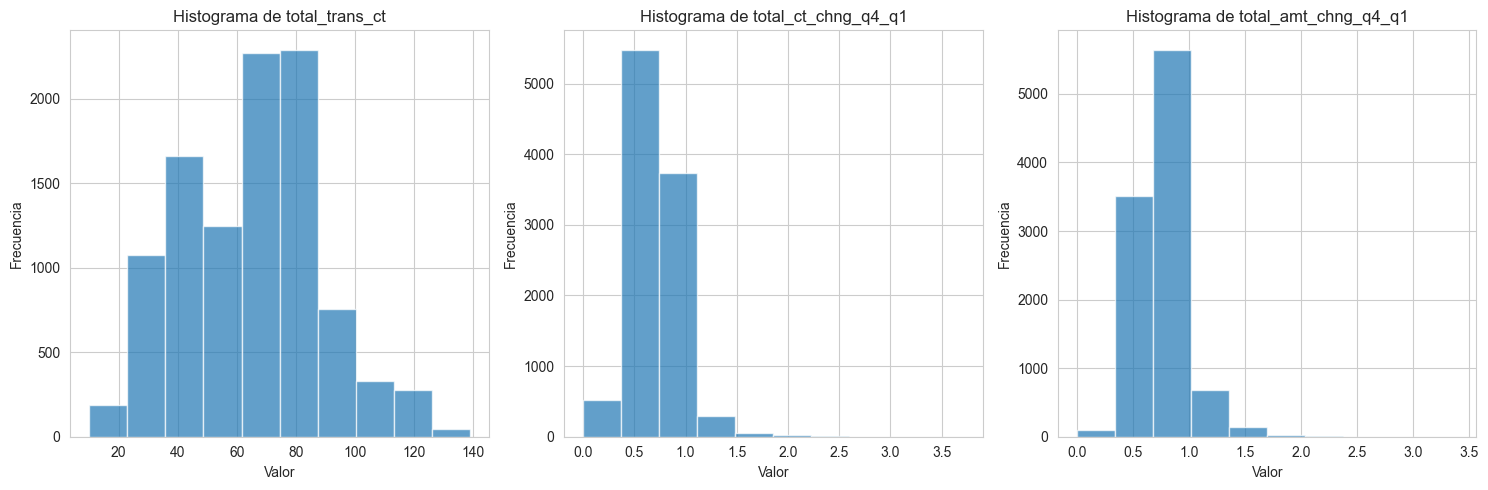

In [112]:
columnas = ['total_trans_ct', 'total_ct_chng_q4_q1', 'total_amt_chng_q4_q1']  

fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))  # 1 fila y tantas columnas como variables

for i, columna in enumerate(columnas):
    axs[i].hist(data[columna], bins=10, alpha=0.7)
    axs[i].set_title(f'Histograma de {columna}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()

plt.show()

<Axes: xlabel='gender', ylabel='credit_limit'>

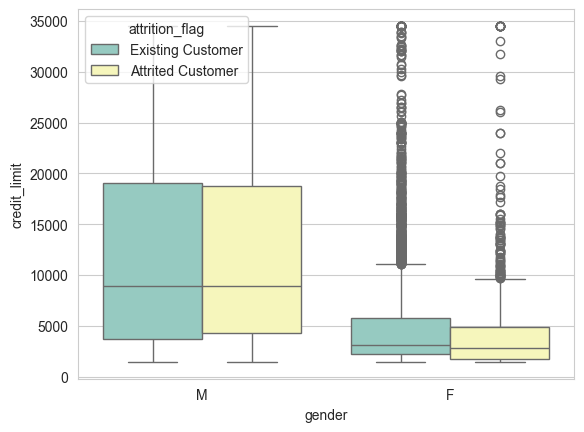

In [141]:
sns.boxplot(data= data, 
            x = 'gender', y = 'credit_limit', hue = 'attrition_flag', palette='Set3')

<Axes: xlabel='attrition_flag', ylabel='credit_limit'>

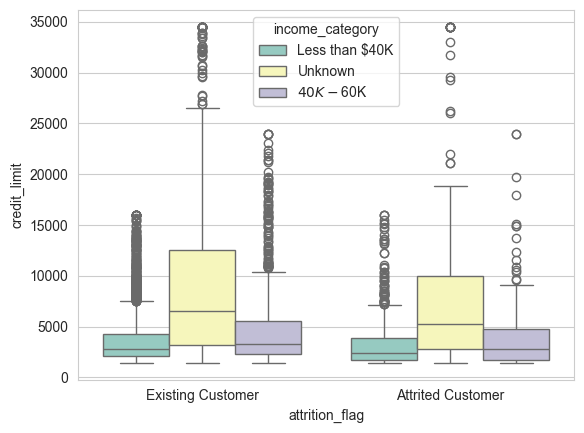

In [121]:
sns.boxplot(data= data[data['gender'] == 'F'], 
            x = 'attrition_flag', y = 'credit_limit', hue = 'income_category', palette='Set3')

<Axes: xlabel='attrition_flag', ylabel='credit_limit'>

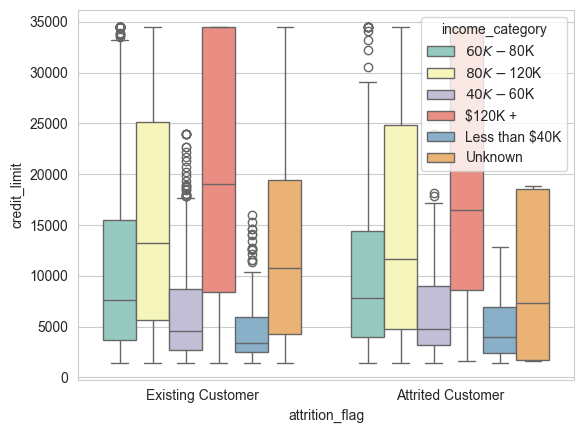

In [122]:
sns.boxplot(data= data[data['gender'] == 'M'], 
            x = 'attrition_flag', y = 'credit_limit', hue = 'income_category', palette='Set3')

<Axes: xlabel='card_category', ylabel='credit_limit'>

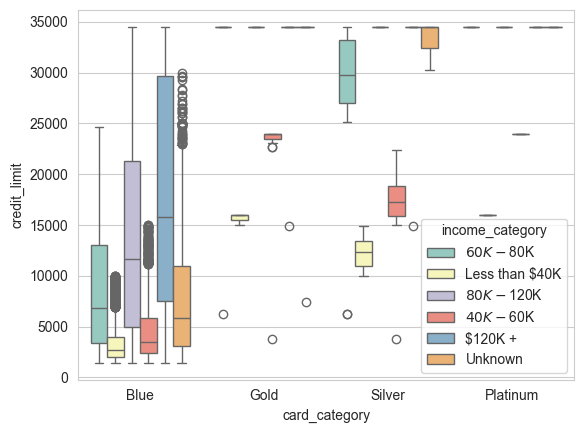

In [4]:
sns.boxplot(data= data, 
            x = 'card_category', y = 'credit_limit', hue = 'income_category', palette='Set3')

<Axes: xlabel='education_level', ylabel='credit_limit'>

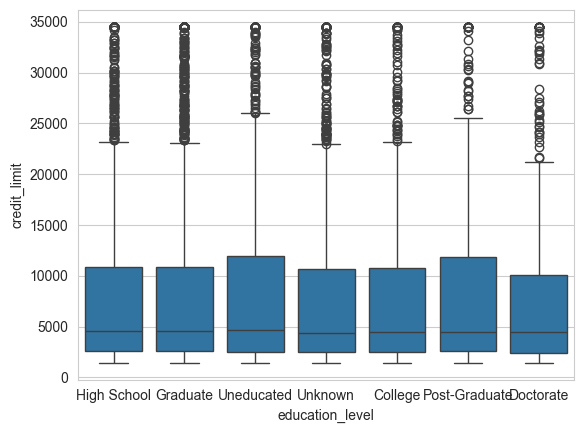

In [136]:
sns.boxplot(data= data,
            x = 'education_level', y = 'credit_limit', hue = 'income_category')

<Axes: xlabel='marital_status', ylabel='credit_limit'>

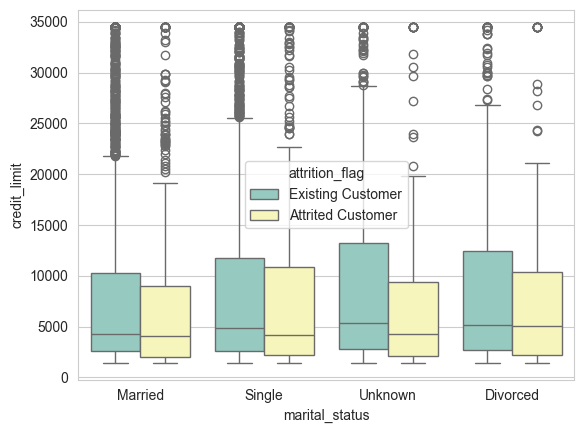

In [138]:
sns.boxplot(data= data, 
            x = 'marital_status', y = 'credit_limit', hue = 'attrition_flag', palette='Set3')

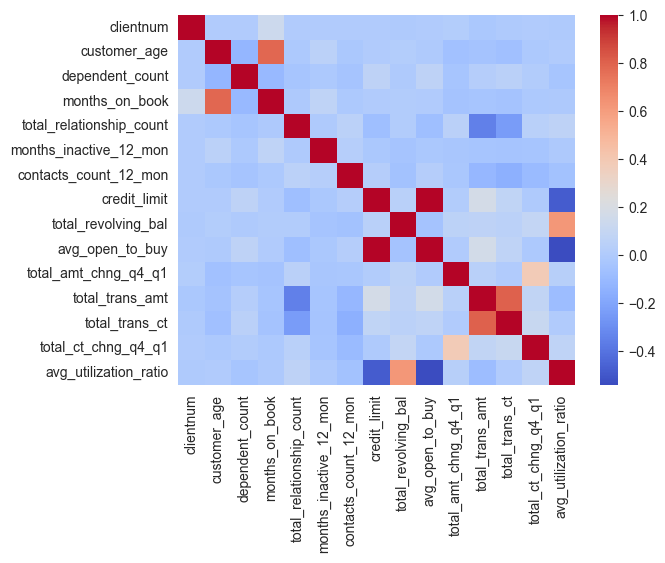

In [13]:
numeric_variables = data.select_dtypes(include=['number'])
correlation_matrix = numeric_variables.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [150]:
data.loc[data['education_level'] == 'Unknown']

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
11,710821833,Existing Customer,65,M,1,Unknown,Married,$40K - $60K,Blue,54,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
15,714885258,Existing Customer,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,...,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230
17,753327333,Existing Customer,41,M,3,Unknown,Married,$80K - $120K,Blue,34,...,4,1,13535.0,1291,12244.0,0.653,1028,21,1.625,0.095
23,811604133,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,712296408,Existing Customer,36,F,3,Unknown,Married,$40K - $60K,Blue,22,...,3,3,12958.0,2273,10685.0,0.608,15681,96,0.627,0.175
10094,716123283,Existing Customer,59,M,1,Unknown,Single,$60K - $80K,Blue,48,...,1,2,7288.0,0,7288.0,0.640,14873,120,0.714,0.000
10095,789023508,Existing Customer,46,M,3,Unknown,Married,$80K - $120K,Blue,33,...,1,3,34516.0,1099,33417.0,0.816,15490,110,0.618,0.032
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096


In [158]:
unk_educationlevel = data.loc[data['education_level'] == 'Unknown']
unk_maritalstatus= data.loc[data['marital_status'] == 'Unknown']
unk_incomecategory = data.loc[data['income_category'] == 'Unknown']

In [165]:
unk_educationlevel.describe().T

,count,mean,std,min,25%,50%,75%,max
clientnum,1519.0,7.400740e+08,3.686304e+07,7.080833e+08,7.131187e+08,7.183575e+08,7.782373e+08,8.282817e+08
customer_age,1519.0,4.642857e+01,7.957479e+00,2.600000e+01,4.100000e+01,4.700000e+01,5.200000e+01,6.700000e+01
dependent_count,1519.0,2.361422e+00,1.330344e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
months_on_book,1519.0,3.585978e+01,7.916691e+00,1.300000e+01,3.200000e+01,3.600000e+01,4.000000e+01,5.600000e+01
total_relationship_count,1519.0,3.797893e+00,1.589854e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
months_inactive_12_mon,1519.0,2.311389e+00,1.032321e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
contacts_count_12_mon,1519.0,2.457538e+00,1.123767e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
credit_limit,1519.0,8.491799e+03,9.028635e+03,1.438300e+03,2.520500e+03,4.411000e+03,1.070950e+04,3.451600e+04
total_revolving_bal,1519.0,1.160450e+03,8.168020e+02,0.000000e+00,2.520000e+02,1.270000e+03,1.785000e+03,2.517000e+03
avg_open_to_buy,1519.0,7.331349e+03,8.995377e+03,1.400000e+01,1.240000e+03,3.393000e+03,9.577000e+03,3.451600e+04


In [6]:
data[['income_category', 'card_category','credit_limit']].groupby(['income_category','card_category']).agg({'credit_limit': 'max'}).reset_index()

,income_category,card_category,credit_limit
0,$120K +,Blue,34516.0
1,$120K +,Gold,34516.0
2,$120K +,Platinum,34516.0
3,$120K +,Silver,34516.0
4,$40K - $60K,Blue,14987.0
5,$40K - $60K,Gold,23981.0
6,$40K - $60K,Platinum,23981.0
7,$40K - $60K,Silver,22361.0
8,$60K - $80K,Blue,24657.0
9,$60K - $80K,Gold,34516.0


In [ ]:
Unknown,Blue,29939.0
Unknown,Gold,34516.0
Unknown,Platinum,34516.0
Unknown, Silver,34516.0


In [26]:
data[['income_category', 'card_category','credit_limit']].groupby(['income_category','card_category']).agg({'credit_limit': 'median'}).reset_index()

,income_category,card_category,credit_limit
0,$120K +,Blue,15769.0
1,$120K +,Gold,34516.0
2,$120K +,Platinum,34516.0
3,$120K +,Silver,34516.0
4,$40K - $60K,Blue,3454.0
5,$40K - $60K,Gold,23981.0
6,$40K - $60K,Platinum,23981.0
7,$40K - $60K,Silver,17304.0
8,$60K - $80K,Blue,6784.0
9,$60K - $80K,Gold,34516.0


In [ ]:
Unknown,Blue,5798.0
Unknown,Gold,34516.0
Unknown,Platinum,34516.0
Unknown,Silver,34516.0


In [99]:
data_2 = data

In [100]:
data_2['income_category'] = data_2['income_category'].replace('Unknown', '$60K - $80K')


In [101]:
data_2['income_category'].value_counts()

income_category
Less than $40K    3561
$60K - $80K       2514
$40K - $60K       1790
$80K - $120K      1535
$120K +            727
Name: count, dtype: int64

In [102]:
data_2[['income_category', 'card_category','credit_limit']].groupby(['income_category','card_category']).agg({'credit_limit': 'median'}).reset_index()

,income_category,card_category,credit_limit
0,$120K +,Blue,15769.0
1,$120K +,Gold,34516.0
2,$120K +,Platinum,34516.0
3,$120K +,Silver,34516.0
4,$40K - $60K,Blue,3454.0
5,$40K - $60K,Gold,23981.0
6,$40K - $60K,Platinum,23981.0
7,$40K - $60K,Silver,17304.0
8,$60K - $80K,Blue,6348.0
9,$60K - $80K,Gold,34516.0


In [34]:
data_2[['education_level', 'income_category', 'credit_limit']].groupby(['education_level','income_category']).agg({'credit_limit': 'median'}).reset_index()

,education_level,income_category,credit_limit
0,College,$120K +,16331.5
1,College,$40K - $60K,3600.0
2,College,$60K - $80K,6846.5
3,College,$80K - $120K,12918.0
4,College,Less than $40K,2718.0
5,Doctorate,$120K +,20148.0
6,Doctorate,$40K - $60K,3532.0
7,Doctorate,$60K - $80K,7306.0
8,Doctorate,$80K - $120K,10292.0
9,Doctorate,Less than $40K,2695.5


In [ ]:
Unknown,$120K +,19857.0 --- Post
Unknown,$40K - $60K,3959.0 --- Graduate
Unknown,$60K - $80K,7114.0 --- High school
Unknown,$80K - $120K,10879.0 --- Doctorate
Unknown,Less than $40K,2709.5 --- College

In [104]:
data_2.loc[(data_2['education_level'] == 'Unknown') & (data_2['income_category'] == '$120K +'), 'education_level'] = 'Post-Graduate'


In [105]:
data_2.loc[(data_2['education_level'] == 'Unknown') & (data_2['income_category'] == '$40K - $60K'), 'education_level'] = 'Graduate'


In [106]:
data_2.loc[(data_2['education_level'] == 'Unknown') & (data_2['income_category'] == '$60K - $80K'), 'education_level'] = 'High School'

In [109]:
data_2.loc[(data_2['education_level'] == 'Unknown') & (data_2['income_category'] == '$80K - $120K'), 'education_level'] = 'Doctorate'

In [107]:
data_2.loc[(data_2['education_level'] == 'Unknown') & (data_2['income_category'] == 'Less than $40K'), 'education_level'] = 'College'

In [110]:
data_2['education_level'].value_counts()

education_level
Graduate         3397
High School      2368
College          1569
Uneducated       1487
Doctorate         670
Post-Graduate     636
Name: count, dtype: int64

In [120]:
### Limpiar Marital_status
### Se incluye el 7,40% que corresponden a los Unknown en la categoría divorciados
### debido a que la media y mediana del límite de crédito son similares
data_2[['marital_status', 'credit_limit']].groupby(['marital_status']).agg({'credit_limit': 'mean'}).reset_index()

,marital_status,credit_limit
0,Divorced,9358.565107
1,Married,8076.661895
2,Single,8999.684758
3,Unknown,9445.283178


In [121]:
data_2[['marital_status', 'credit_limit']].groupby(['marital_status']).agg({'credit_limit': 'median'}).reset_index()

,marital_status,credit_limit
0,Divorced,5119.5
1,Married,4234.0
2,Single,4712.0
3,Unknown,5222.0


In [122]:
data_2.loc[(data_2['marital_status'] == 'Unknown'), 'marital_status'] = 'Divorced'

In [123]:
data_2['marital_status'].value_counts()

marital_status
Married     4687
Single      3943
Divorced    1497
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='credit_limit'>

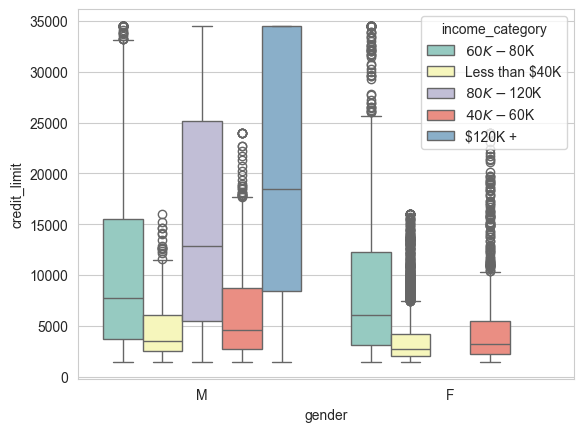

In [36]:
sns.boxplot(data= data_2, 
            x = 'gender', y = 'credit_limit', hue = 'income_category', palette='Set3')